In [2]:
from sklearn.metrics import accuracy_score # for calculating accuracy of model
from sklearn.model_selection import train_test_split # for splitting the dataset for training and testing
from sklearn.metrics import classification_report # for generating a classification report of model
import pickle # saving and loading trained model
from os import path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
     

bin_data = pd.read_csv('datasets/bin_data.csv')
bin_data.drop(bin_data.columns[0],axis=1,inplace=True)
multi_data = pd.read_csv('datasets/multi_data.csv')
multi_data.drop(multi_data.columns[0],axis=1,inplace=True)
le1_classes_ = np.load('le1_classes.npy',allow_pickle=True)
le2_classes_ = np.load('le2_classes.npy',allow_pickle=True)

In [3]:
from sklearn.model_selection import train_test_split

# Assuming `bin_data` is your final DataFrame and you're using 'intrusion' as the target label
X = bin_data.drop(['label', 'intrusion'], axis=1)
y = bin_data['intrusion']

# Split into training and test sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
# importing library for K-neares-neighbor classifier
from sklearn.neighbors import KNeighborsClassifier
     

knn=KNeighborsClassifier(n_neighbors=5) # creating model for 5 neighbors
knn.fit(X_train,y_train) # training model on training dataset

KNeighborsClassifier()

In [5]:
pkl_filename = "./models/knn_binary.pkl"
if (not path.isfile(pkl_filename)):
  # saving the trained model to disk
  with open(pkl_filename, 'wb') as file:
    pickle.dump(knn, file)
  print("Saved model to disk")
  # loading the trained model from disk
  with open(pkl_filename, 'rb') as file:
    knn = pickle.load(file)
  print("Loaded model from disk")
     

In [6]:
y_pred=knn.predict(X_test) # predicting target attribute on testing dataset
ac=accuracy_score(y_test, y_pred)*100 # calculating accuracy of predicted data
print("KNN-Classifier Binary Set-Accuracy is ", ac)

KNN-Classifier Binary Set-Accuracy is  99.97221670966462


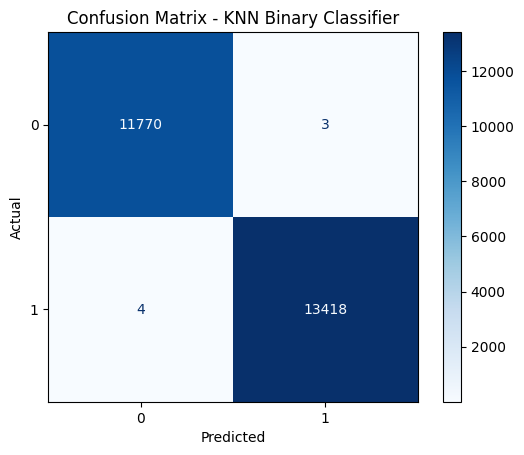

In [10]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=knn.classes_)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot(cmap=plt.cm.Blues)

# Show the plot
plt.title("Confusion Matrix - KNN Binary Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.grid(False)
plt.show()


In [5]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import pickle
import numpy as np
import pandas as pd
import os

# Load the multiclass dataset
multi_data = pd.read_csv('datasets/multi_data.csv')
multi_data.drop(multi_data.columns[0], axis=1, inplace=True)

# Define features and target label
X = multi_data.drop(['label', 'intrusion'], axis=1)
y = multi_data['intrusion']  # Multiclass target

# Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Save the trained model
model_path = "./models/knn_multiclass.pkl"
if not os.path.isfile(model_path):
    with open(model_path, 'wb') as file:
        pickle.dump(knn, file)
    print("Multiclass KNN model saved to disk.")

# Load the model (optional safety step)
with open(model_path, 'rb') as file:
    knn = pickle.load(file)
print("Multiclass KNN model loaded from disk.")

# Make predictions
y_pred = knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred) * 100
print(f"KNN-Classifier Multiclass Accuracy: {accuracy:.2f}%")

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Multiclass KNN model loaded from disk.
KNN-Classifier Multiclass Accuracy: 99.95%

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9181
           1       1.00      1.00      1.00      2357
           2       1.00      0.99      0.99       224
           3       1.00      0.82      0.90        11
           4       1.00      1.00      1.00     13422

    accuracy                           1.00     25195
   macro avg       1.00      0.96      0.98     25195
weighted avg       1.00      1.00      1.00     25195



USING SVM

In [1]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import pickle
import numpy as np
import pandas as pd
import os

# Load the multiclass dataset
multi_data = pd.read_csv('datasets/multi_data.csv')
multi_data.drop(multi_data.columns[0], axis=1, inplace=True)

# Define features and target label
X = multi_data.drop(['label', 'intrusion'], axis=1)
y = multi_data['intrusion']

# Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train SVM classifier
svm = SVC(kernel='rbf', C=1.0, gamma='scale')
svm.fit(X_train, y_train)

# Save the trained model
model_path = "./models/svm_multiclass.pkl"
if not os.path.isfile(model_path):
    with open(model_path, 'wb') as file:
        pickle.dump(svm, file)
    print("Multiclass SVM model saved to disk.")

# Load the model
with open(model_path, 'rb') as file:
    svm = pickle.load(file)
print("Multiclass SVM model loaded from disk.")

# Make predictions
y_pred = svm.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred) * 100
print(f"SVM Classifier Multiclass Accuracy: {accuracy:.2f}%")

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Multiclass SVM model saved to disk.
Multiclass SVM model loaded from disk.
SVM Classifier Multiclass Accuracy: 100.00%

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9181
           1       1.00      1.00      1.00      2357
           2       1.00      1.00      1.00       224
           3       1.00      1.00      1.00        11
           4       1.00      1.00      1.00     13422

    accuracy                           1.00     25195
   macro avg       1.00      1.00      1.00     25195
weighted avg       1.00      1.00      1.00     25195



In [6]:
import pandas as pd
import numpy as np

# Step 1: Load your dataset
multi_data = pd.read_csv('datasets/multi_data.csv')

# Step 2: Preprocess the dataset as needed (e.g., dropping the 'label' and 'intrusion' columns)
X_train = multi_data.drop(['label', 'intrusion'], axis=1)

# Step 3: Save the column names (feature names) to a .npy file
train_columns = X_train.columns.to_numpy()

# Step 4: Save to a .npy file for later use (during testing)
np.save('train_columns_multi.npy', train_columns)

print("Training columns saved to 'train_columns_multi.npy'")

Training columns saved to 'train_columns_multi.npy'


USING RANDOMFOREST

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
import pickle
import numpy as np
import pandas as pd
import os

# Load the multiclass dataset
multi_data = pd.read_csv('datasets/multi_data.csv')
multi_data.drop(multi_data.columns[0], axis=1, inplace=True)

# Define features and target label
X = multi_data.drop(['label', 'intrusion'], axis=1)
y = multi_data['intrusion']

# Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Save the trained model
model_path = "./models/rf_multiclass.pkl"
if not os.path.isfile(model_path):
    with open(model_path, 'wb') as file:
        pickle.dump(rf, file)
    print("Multiclass Random Forest model saved to disk.")

# Load the model
with open(model_path, 'rb') as file:
    rf = pickle.load(file)
print("Multiclass Random Forest model loaded from disk.")

# Make predictions
y_pred = rf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred) * 100
print(f"Random Forest Classifier Multiclass Accuracy: {accuracy:.2f}%")

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Multiclass Random Forest model loaded from disk.
Random Forest Classifier Multiclass Accuracy: 100.00%

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9181
           1       1.00      1.00      1.00      2357
           2       1.00      1.00      1.00       224
           3       1.00      1.00      1.00        11
           4       1.00      1.00      1.00     13422

    accuracy                           1.00     25195
   macro avg       1.00      1.00      1.00     25195
weighted avg       1.00      1.00      1.00     25195



In [ ]:
import os

# Load the multiclass dataset
multi_data = pd.read_csv('datasets/multi_data.csv')
multi_data.drop(multi_data.columns[0], axis=1, inplace=True)

# Define features and target label
X = multi_data.drop(['label', 'intrusion'], axis=1)
y = multi_data['intrusion']

# Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Save the trained model
model_path = "./models/rf_multiclass.pkl"
if not os.path.isfile(model_path):
    with open(model_path, 'wb') as file:
        pickle.dump(rf, file)
    print("Multiclass Random Forest model saved to disk.")

# Load the model
with open(model_path, 'rb') as file:
    rf = pickle.load(file)
print("Multiclass Random Forest model loaded from disk.")

# Make predictions
y_pred = rf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred) * 100
print(f"Random Forest Classifier Multiclass Accuracy: {accuracy:.2f}%")

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


In [3]:
import pandas as pd
import numpy as np

# Step 1: Load your dataset
multi_data = pd.read_csv('datasets/multi_data.csv')

# Step 2: Preprocess the dataset as needed (e.g., dropping the 'label' and 'intrusion' columns)
X_train = multi_data.drop(['label', 'intrusion'], axis=1)

# Step 3: Save the column names (feature names) to a .npy file
train_columns = X_train.columns.to_numpy()

# Step 4: Save to a .npy file for later use (during testing)
np.save('train_columns_multi.npy', train_columns)

print("Training columns saved to 'train_columns_multi.npy'")



Training columns saved to 'train_columns_multi.npy'


In [7]:
import numpy as np
train_features = np.array(['duration', 'protocol', 'packet_size', 'src_bytes', 'dst_bytes', 'tcp_flags', 'payload_length', 'ttl'])
np.save('train_coloum1.npy', train_features)


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load the dataset
df = pd.read_csv("nsl_kdd_8features.csv")

# Display the first few rows (optional for understanding)
print(df.head())

# Assume the last column is the target (label)
X = df.iloc[:, :-1]  # Features
y = df.iloc[:, -1]   # Target

# Encode categorical labels if needed
if y.dtype == 'object':
    y = y.astype('category').cat.codes

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


   duration  protocol  packet_size  src_bytes  dst_bytes  tcp_flags  \
0         0         1          491        491          0          9   
1         0         2          146        146          0          9   
2         0         1            0          0          0          5   
3         0         1         8385        232       8153          9   
4         0         1          619        199        420          9   

   payload_length  ttl  label_enc  
0             491   64         11  
1             146   64         11  
2               0   64          9  
3             232   64         11  
4             199   64         11  
Accuracy: 0.9401865449493947
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       191
           1       0.57      0.67      0.62         6
           2       1.00      0.50      0.67         2
           3       1.00      1.00      1.00        11
           4       0.00      0.00

c:\Users\babun\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\babun\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\babun\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [4]:
model_path = "rf_model_nsl_kdd.pkl"
joblib.dump(rf_model, model_path)
print(f"Model saved to: {model_path}")

Model saved to: rf_model_nsl_kdd.pkl
